# Simulations visualizer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

### Taking a look at the simulation images

In [2]:
# Range
start = 0
end = 10

Image 0:
  Mean intensity: 0.001


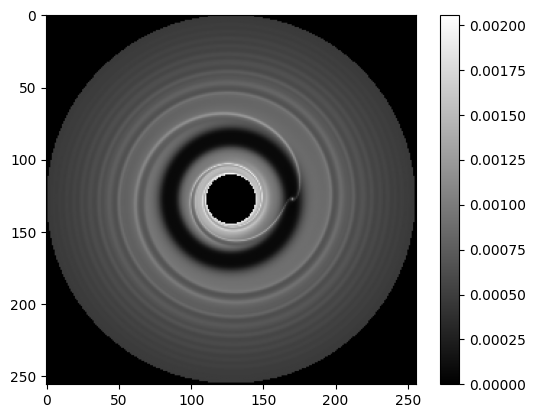

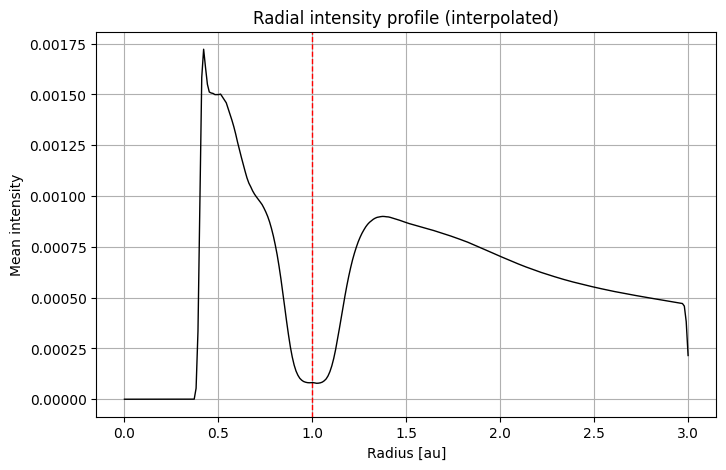

Image 1:
  Mean intensity: 0.000


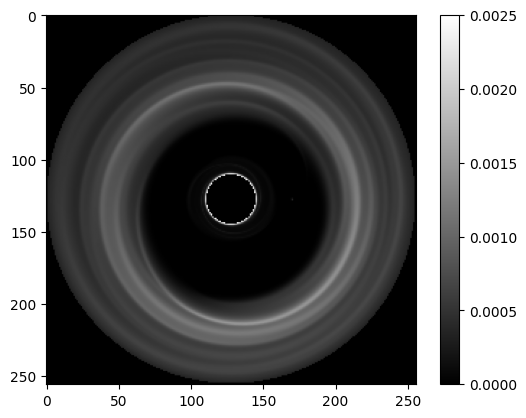

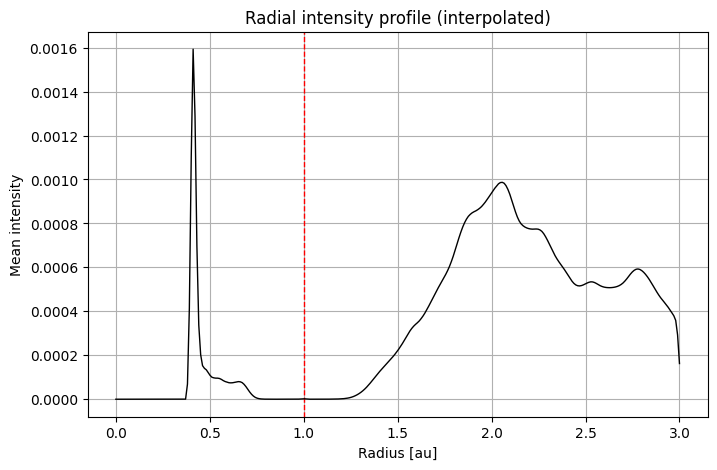

Image 2:
  Mean intensity: 0.000


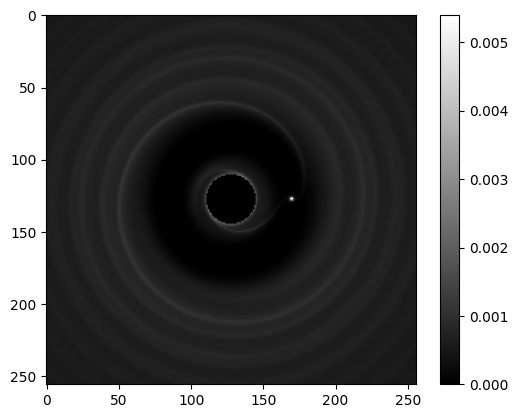

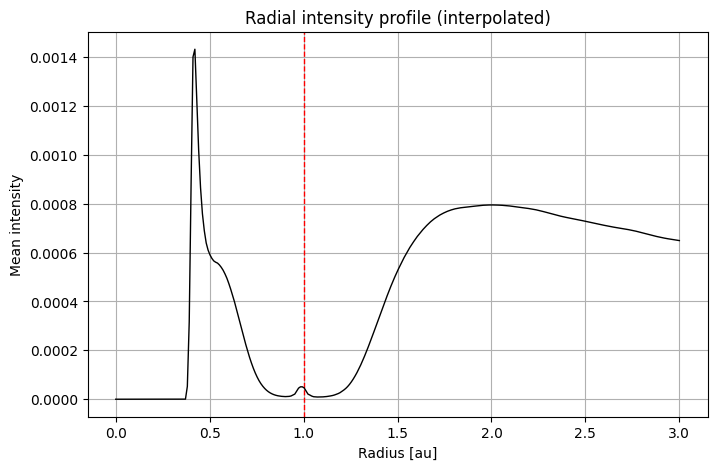

Image 3:
  Mean intensity: 0.001


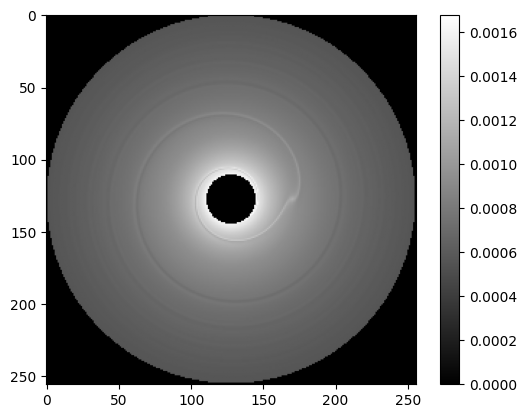

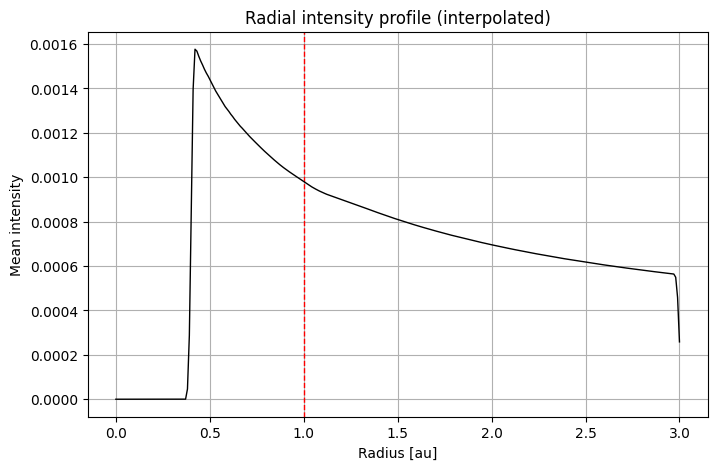

Image 4:
  Mean intensity: 0.001


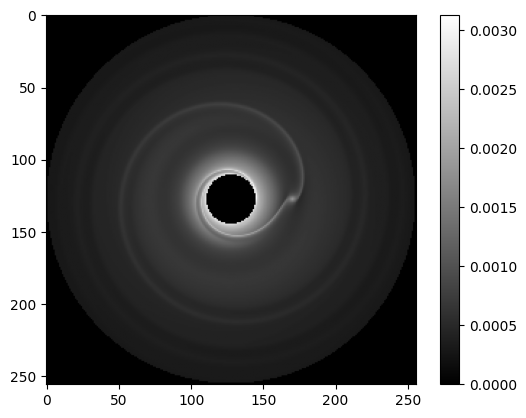

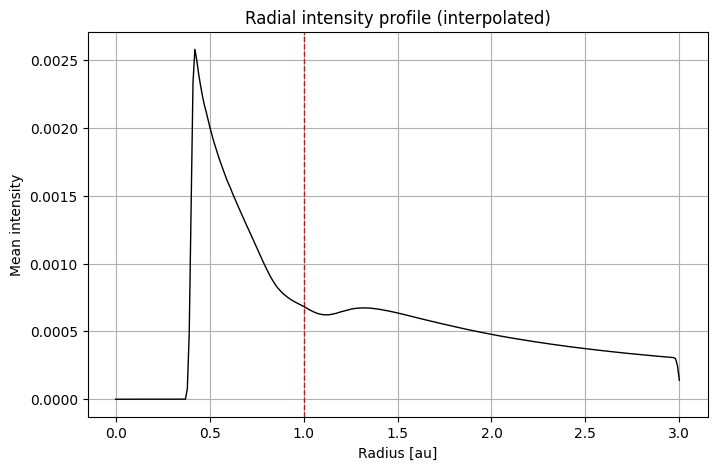

Image 5:
  Mean intensity: 0.000


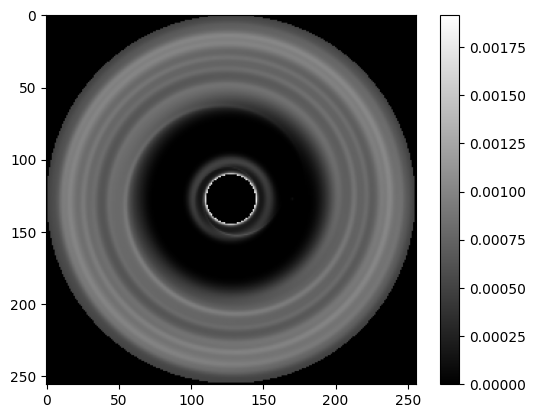

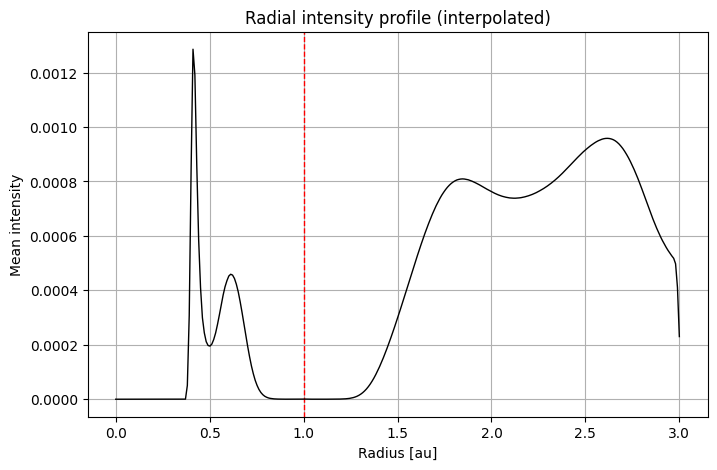

Image 6:
  Mean intensity: 0.001


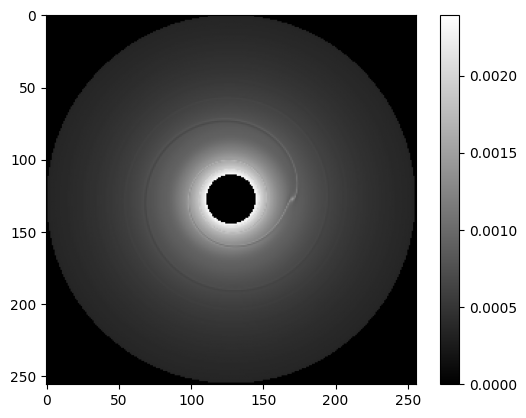

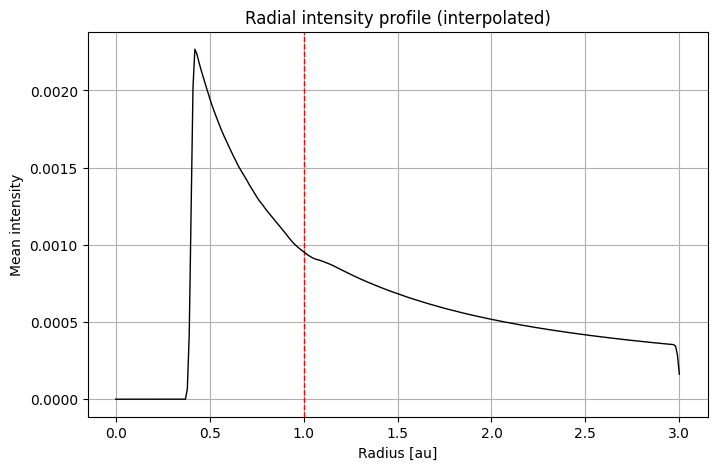

Image 7:
  Mean intensity: 0.001


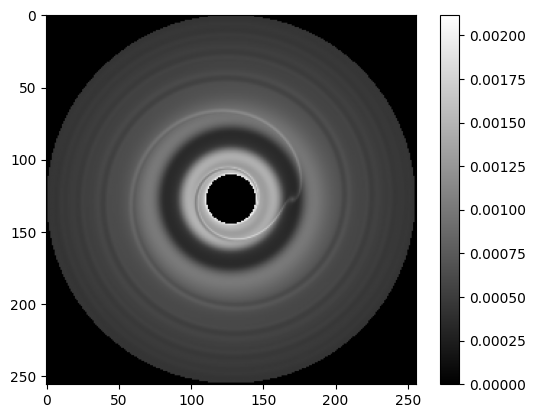

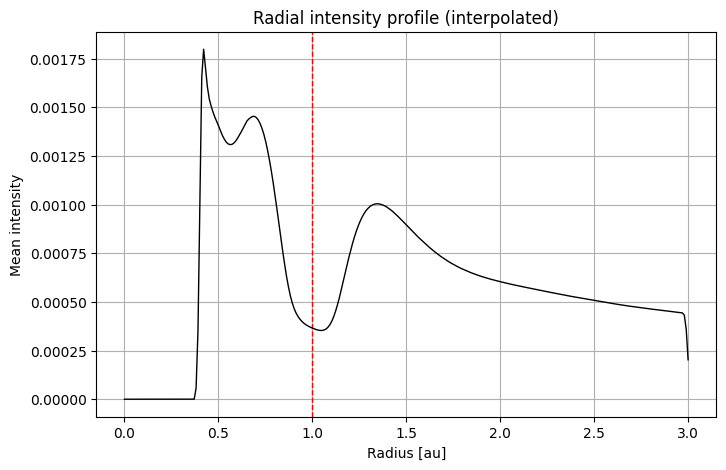

Image 8:
  Mean intensity: 0.001


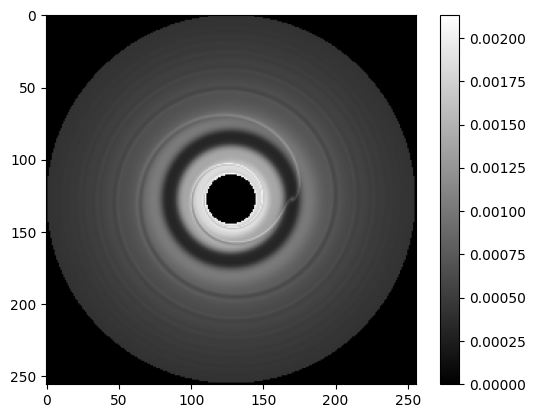

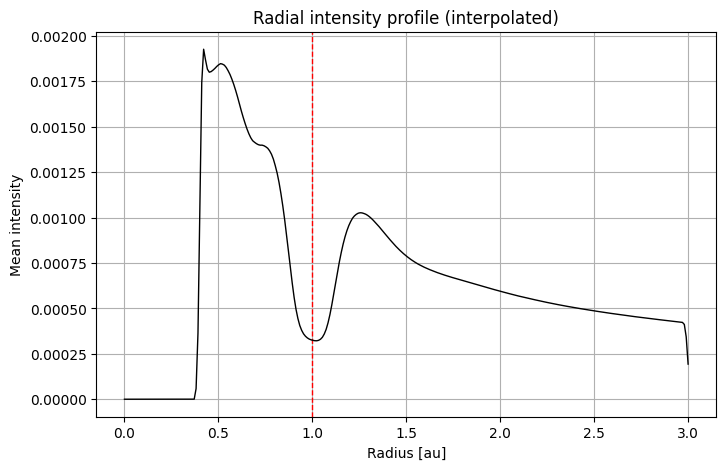

Image 9:
  Mean intensity: 0.000


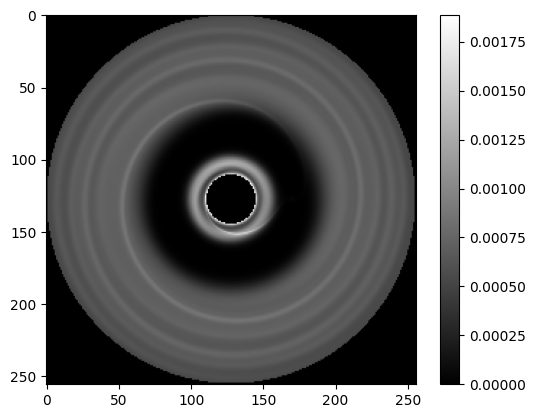

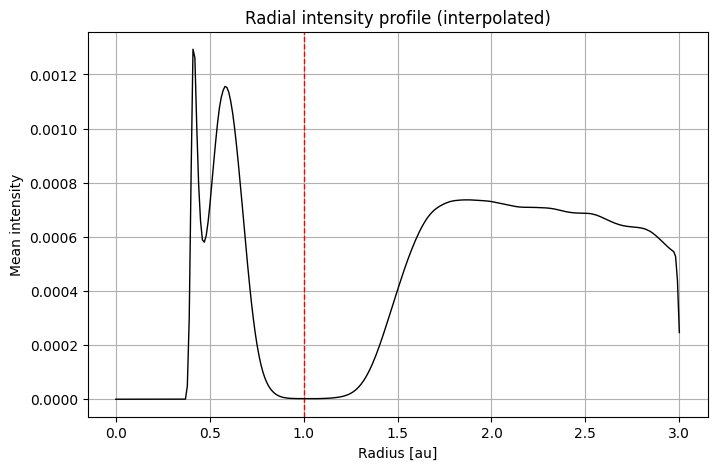

In [3]:
# Here goes the npy file with the symulation density profiles
intensity_tot = np.load("../profiles/dens_test.npy")
for i in range(start, end):
    intensity = intensity_tot[i]
    ny, nx = intensity.shape
    x = np.linspace(-3, 3, nx)
    y = np.linspace(-3, 3, ny)
    xx, yy = np.meshgrid(x, y)

    # Coordinate polari
    r = np.sqrt(xx**2 + yy**2)
    theta = np.arctan2(yy, xx)

    # Flatten
    points = np.vstack((xx.flatten(), yy.flatten())).T
    values = intensity.flatten()

    # Nuova griglia polare (r, θ)
    r_i = np.linspace(0, 3, 300)
    theta_i = np.linspace(-np.pi, np.pi, 360)
    rr, tt = np.meshgrid(r_i, theta_i)

    # Converti griglia polare in x, y
    xi = rr * np.cos(tt)
    yi = rr * np.sin(tt)

    # Interpola
    grid_intensity = griddata(points, values, (xi, yi), method='linear', fill_value=0)

    # Profilo radiale = media lungo θ
    profile = np.mean(grid_intensity, axis=0)

    plt.imshow(grid_intensity)

    print(f"Image {i}:")
    print(f"  Mean intensity: {np.mean(profile):.3f}")
    # Plot 2D
    plt.imshow(intensity, cmap="grey")
    plt.colorbar()
    plt.show()

    # Plot 1D
    plt.figure(figsize=(8, 5))
    plt.axvline(1.0,
                color='red',
                linestyle='--',
                linewidth=1)
    plt.plot(
        r_i,
        profile,
        color="black",
        linewidth=1,
    )
    plt.xlabel("Radius [au]")
    plt.ylabel("Mean intensity")
    plt.title("Radial intensity profile (interpolated)")
    plt.grid(True)
    plt.show()